In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv",encoding='latin1')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
data['avg_score'] = data[['math score','reading score','writing score']].mean(axis=1)

In [7]:
data.describe()

,math score,reading score,writing score,avg_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [8]:
data.drop(columns=['math score','reading score','writing score'],inplace=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

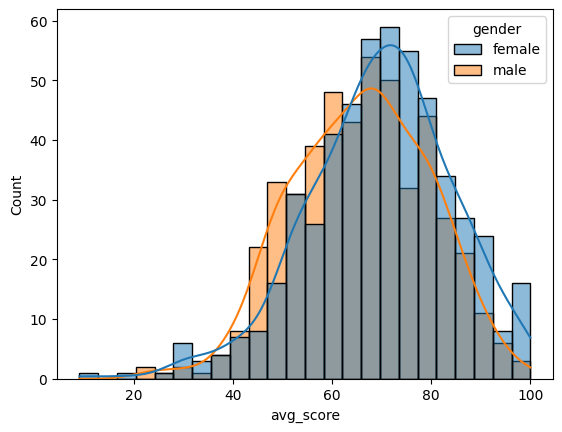

In [9]:
sns.histplot(data=data,x=data['avg_score'],hue='gender',kde=True)
plt.show()

* Female have great numbers in 60-80 bracket of average score.
* Male have a wider distribution of average score.
* Male have more numbers in the 40-60 bracket which is lower than females.
* There is cleare gap in average score between male and female.

In [10]:
data['score_performance'] = pd.cut(data['avg_score'],bins = [0,60,80,100],labels = ['low','medium','high'])

In [11]:
data.drop(columns=['avg_score'],inplace=True)

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


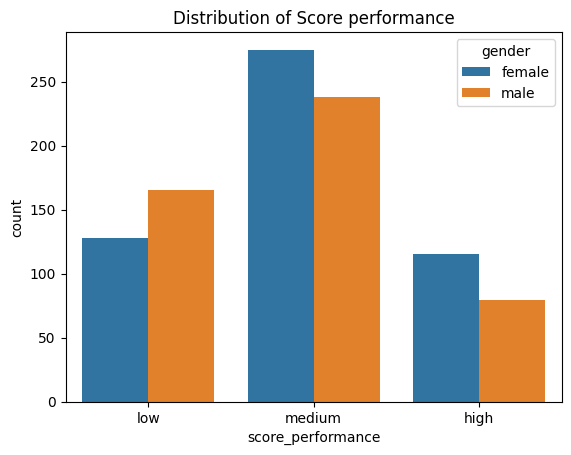

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


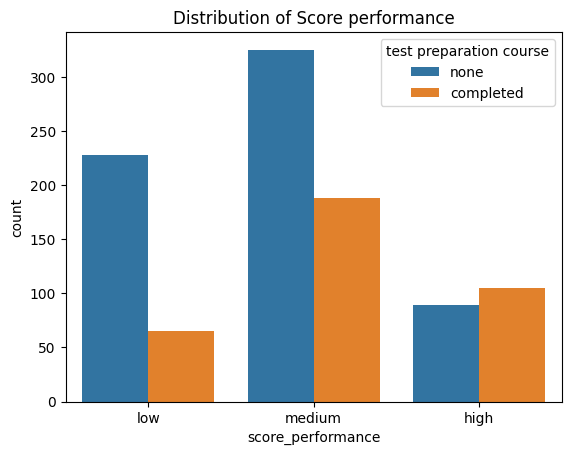

In [12]:
columns = ['gender','test preparation course']

for column in columns:
    sns.countplot(data=data, x='score_performance' ,hue=column)
    plt.title('Distribution of Score performance')
    plt.show()

In [13]:
y = data['score_performance']
X = data.drop(columns=['score_performance'])
X = pd.get_dummies(X,columns=['gender','race/ethnicity','parental level of education','lunch','test preparation course'],drop_first=True)

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(data['score_performance'])


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=200, class_weight='balanced')
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)

print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


🔹 Logistic Regression Accuracy: 0.455

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.76      0.43        29
           1       0.49      0.67      0.57        64
           2       0.65      0.24      0.35       107

    accuracy                           0.46       200
   macro avg       0.48      0.56      0.45       200
weighted avg       0.55      0.46      0.43       200


Confusion Matrix:
 [[22  5  2]
 [ 9 43 12]
 [42 39 26]]


In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


🔹 Random Forest Accuracy: 0.395

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.41      0.32        29
           1       0.35      0.42      0.38        64
           2       0.51      0.37      0.43       107

    accuracy                           0.40       200
   macro avg       0.38      0.40      0.38       200
weighted avg       0.43      0.40      0.40       200


Confusion Matrix:
 [[12  8  9]
 [ 8 27 29]
 [25 42 40]]
